In [55]:
#final output contains the merged file for sulfate, nitrate and the metadata etc.
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import (mean_absolute_error, mean_squared_error, 
                             mean_absolute_percentage_error, explained_variance_score, 
                             max_error, mean_squared_log_error, median_absolute_error, 
                             r2_score, mean_poisson_deviance, mean_gamma_deviance)

In [56]:
df = pd.read_excel('/Users/defne/Downloads/final_output.xlsx')
# Remove the Unnamed: 0 and Datetime columns
df = df.drop(columns=['Unnamed: 0', 'Datetime'])

In [57]:
for colname in df.columns:
    df = df[pd.to_numeric(df[colname], errors='coerce').notnull()]

In [58]:
df.columns

Index(['Milano_Cu_Obs', 'Lat', 'Lon', 'Cu', 'T', 'RH', 'P', 'WS', 'WD', 'PBLH',
       '01-agriculture_mean', '02-barren_mean', '03-industrial_transport_mean',
       '04-natural_areas_mean', '05-snow_ice_mean', '06-urban_fabric_mean',
       '07-urban_green_mean', '08-water_mean', '09-wetlands_mean',
       '10-IMD_Fraction', 'rc_1_100', 'rc_1_1000', 'rc_1_10000', 'rc_1_200',
       'rc_1_2000', 'rc_1_300', 'rc_1_400', 'rc_1_50', 'rc_1_500', 'rc_1_5000',
       'rc_1_700', 'rc_2_100', 'rc_2_1000', 'rc_2_10000', 'rc_2_200',
       'rc_2_2000', 'rc_2_300', 'rc_2_400', 'rc_2_50', 'rc_2_500', 'rc_2_5000',
       'rc_2_700', 'rc_3_100', 'rc_3_1000', 'rc_3_10000', 'rc_3_200',
       'rc_3_2000', 'rc_3_300', 'rc_3_400', 'rc_3_50', 'rc_3_500', 'rc_3_5000',
       'rc_3_700', 'NO3-', 'SO42-'],
      dtype='object')

In [59]:
df.shape

(1672, 55)

In [60]:
#Initial version without the cross validation
# Define the variable to predict (Nitrate) and features
y = df['NO3-'] 
X = df.drop(columns=['NO3-'])  # Drop the target column from the features

# Split the data into training and validation sets
xv = X.sample(frac=0.2)        # X for validation (20%)
xx = X.drop(xv.index)          # X for training (80%)
yv = y.loc[xv.index]           # Y for validation (20%)
yx = y.drop(xv.index)          # Y for training (80%)

# Initialize and train the RandomForestRegressor
regr = RandomForestRegressor(max_depth=200, random_state=666) # Need to tune these parameters
regr.fit(xx, yx)  # Train with training data (80%)

# Make predictions
y_tra = regr.predict(xx)  # Predictions on training set
y_val = regr.predict(xv)  # Predictions on validation set


0.8787516963032089
Mean Absolute Error (MAE): 1.6428283838272557
Mean Squared Error (MSE): 9.651706931563485
Root Mean Squared Error (RMSE): 3.106719641609697


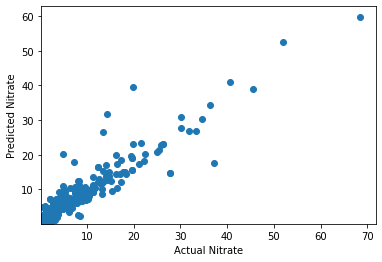

In [61]:
# Evaluate the model
print(regr.score(xv, yv))
print('Mean Absolute Error (MAE):', mean_absolute_error(yv, y_val))
print('Mean Squared Error (MSE):', mean_squared_error(yv, y_val))
print('Root Mean Squared Error (RMSE):', mean_squared_error(yv, y_val, squared=False))

# Plot results
plt.figure()
plt.scatter(yv, y_val)
plt.xlabel('Actual Nitrate')
plt.ylabel('Predicted Nitrate')
plt.xlim(0.1)
plt.ylim(0.1)
plt.show()


In [62]:
#Implementing cross validation
df = pd.read_excel('/Users/defne/Downloads/final_output.xlsx')
# Remove the Unnamed: 0 and Datetime columns
df = df.drop(columns=['Unnamed: 0', 'Datetime'])
for colname in df.columns:
    df = df[pd.to_numeric(df[colname], errors='coerce').notnull()]

In [63]:
from sklearn.model_selection import cross_val_score
# Define the target variable (Nitrate) and features
y = df['NO3-']  
X = df.drop(columns=['NO3-'])  # Drop the target column from the features

# Initialize the RandomForestRegressor
regr = RandomForestRegressor(max_depth=200, random_state=666) #Need to tune these parameters

# Perform cross-validation
cv_scores = cross_val_score(regr, X, y, cv=5)  # 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# Train the model on the entire dataset
regr.fit(X, y)

Cross-validation scores: [0.95791207 0.63134372 0.62844595 0.88812986 0.94127444]
Mean CV Score: 0.8094212066452323


RandomForestRegressor(max_depth=200, random_state=666)

In [64]:
#Demonstrating the performance after cross validation
# Split the data into training and validation sets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=666)

In [65]:
# Train on training data and evaluate on validation data
# Initialize the RandomForestRegressor
regr = RandomForestRegressor(max_depth=200, random_state=666)
regr.fit(X_train, y_train)
y_val_pred = regr.predict(X_val)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_mse = mean_squared_error(y_val, y_val_pred)

0.8363617341844745
Mean Absolute Error (MAE): 1.7949415315917152
Mean Squared Error (MSE): 13.624620236379554
Root Mean Squared Error (RMSE): 3.691154323024107


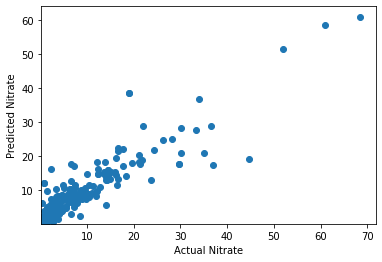

In [66]:
# Evaluate the model
print(regr.score(X_val, y_val))
print('Mean Absolute Error (MAE):',val_mae)
print('Mean Squared Error (MSE):', val_mse)
print('Root Mean Squared Error (RMSE):',mean_squared_error(y_val, y_val_pred, squared=False))

# Plot results
plt.figure()
plt.scatter(y_val, y_val_pred)
plt.xlabel('Actual Nitrate')
plt.ylabel('Predicted Nitrate')
plt.xlim(0.1)
plt.ylim(0.1)
plt.show()
